In [6]:
## instantaneous goodput

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

schedulerTypes = [0]

topdir = "../results-wns3/"

def helpone(num,i):
    # dir = 'dynamic0-67'
    # dir = 'dynamic1-16'
    dir = '../results-wns3/one-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal

def helptwo(num,i):
    dir = '../results-wns3/two-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


def helpfour(num,i):
    dir = '../results-wns3/four-'+str(num)
    file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(dir+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '4' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '5' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal

j = 39
one = helpone(j,0)
two = helptwo(j,0)
four = helpfour(j,0)  
print(four)


         Time   goodput  scheduler
0     0.00000       NaN          0
1     1.17899       NaN          0
2     1.17899       NaN          0
3     1.17899       NaN          0
4     1.17899       NaN          0
...       ...       ...        ...
1972  3.18149  20.58493          0
1973  3.18149  20.58493          0
1974  3.18149  20.53435          0
1975  3.18149  20.53435          0
1976  3.18728  20.51395          0

[1977 rows x 3 columns]


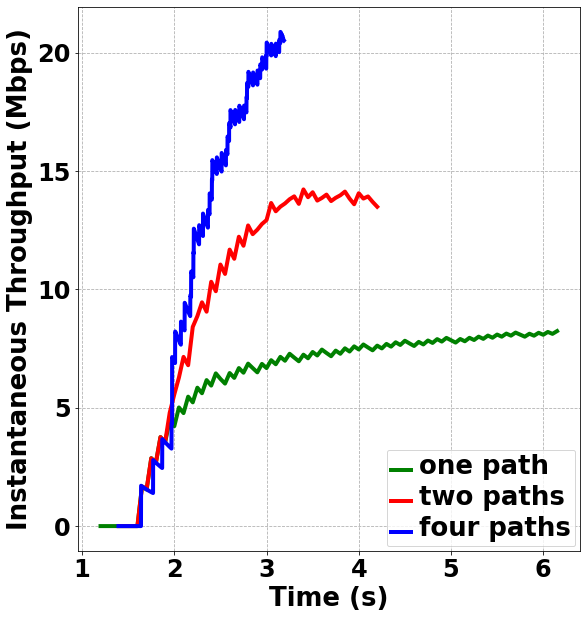

In [18]:

plt.figure(figsize=(9, 10))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
# ax.spines['top'].set_visible(False)  # 去掉上边框
# ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(one['Time'], one['goodput'], color="green", label="one path", linewidth=4)
plt.plot(two['Time'], two['goodput'], color="red", label="two paths", linewidth=4)
plt.plot(four['Time'], four['goodput'], color="blue", label="four paths", linewidth=4)
# plt.plot(ecf['Time'], ecf['goodput'], color="c", label="ECF", linewidth=4)
# plt.plot(mab['Time'], mab['goodput'], color="orange", label="MAB", linewidth=4)

# group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9']  # x轴刻度的标识
plt.xticks(fontsize=24, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=24, fontweight='bold')
# plt.title("Medium Dynamicity", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Instantaneous Throughput (Mbps)", fontsize=26, fontweight='bold')
plt.xlabel("Time (s)", fontsize=26, fontweight='bold')
# plt.xlim(4, 15)  # 设置x轴的范围
# plt.ylim(4, 14)
# plt.ylim(2, 12)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=4, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=26, fontweight='bold')  # 设置图例字体的大小和粗细

plt.savefig('./ins_throughput_scalable.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.savefig('./ins_throughput_scalable.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
# plt.savefig('./goodput_medium.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
# plt.savefig('./goodput_high.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()


In [161]:
# rr = dataTotal.loc[dataTotal['scheduler'] == "0"]
# minrtt = dataTotal.loc[dataTotal['scheduler'] == "1"]
# blest = dataTotal.loc[dataTotal['scheduler'] == "2"]
# print(mab)